In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('seaborn')

## Data Preparation

In [24]:
mean_01=np.array([1,0.5])
cov_01=np.array([[1,0.1],[0.2,1.2]])

mean_02=np.array([6,8])
cov_02=np.array([[1.21,0.1],[0.2,1.3]])

#Normal Distribution
dist_01=np.random.multivariate_normal(mean_01,cov_01,500)

dist_02=np.random.multivariate_normal(mean_02,cov_02,500)
print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


<ipython-input-24-d053e116b109>:8: RuntimeWarning: covariance is not positive-semidefinite.
  dist_01=np.random.multivariate_normal(mean_01,cov_01,500)
<ipython-input-24-d053e116b109>:10: RuntimeWarning: covariance is not positive-semidefinite.
  dist_02=np.random.multivariate_normal(mean_02,cov_02,500)


## Data Visualise

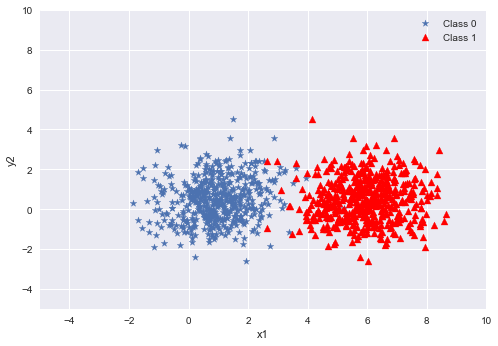

In [47]:
#plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],marker='*',label='Class 0')
plt.scatter(dist_02[:,0],dist_01[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('y2')
plt.legend()
plt.show()


# Create Training and Test Set

In [26]:
data = np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [27]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0
print(data)

[[ 0.26574335  2.20192668  0.        ]
 [ 0.85689518 -0.330821    0.        ]
 [ 1.87715066  1.72241734  0.        ]
 ...
 [ 6.51154205 10.95681681  1.        ]
 [ 6.65158774  8.77077958  1.        ]
 [ 5.95992383  8.82456     1.        ]]


In [28]:
np.random.shuffle(data)
print(data[:10])

[[-0.1735856  -0.96882542  0.        ]
 [ 5.05610532  7.96092955  1.        ]
 [ 4.06442216  8.89068864  1.        ]
 [ 6.36232431  7.27283923  1.        ]
 [ 1.8869778   2.33156158  0.        ]
 [-1.3873229   0.40207572  0.        ]
 [ 6.59265848  7.96549721  1.        ]
 [ 1.72519219  0.75168033  0.        ]
 [ 0.89553013  0.70535446  0.        ]
 [ 0.28150675  0.34659788  0.        ]]


In [29]:
print(data.shape[0])
split = int(0.8*data.shape[0])
print(split)

1000
800


In [30]:
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


In [31]:
#testing and training data separated

## Logistic Rgression Functions

In [32]:
def hypothesis(x,w,b):
    #accepts input vector x,input vector theta(called weight w) and bais b
    h=np.dot(x,w)+b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))

def error(y_true,x,w,b):
    m=x.shape[0]
    err=0.0
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        err+=y_true[i]*np.log2(hx)+(1-y_true[i])*np.log2(1-hx)
    
    return -err/m

def get_grads(y_true,x,w,b):
    grad_w=np.zeros(w.shape)
    grad_b=0.0
    m=x.shape[0]
    
    
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        
        grad_w+=(y_true[i]-hx)*x[i]
        grad_b+=(y_true[i]-hx)       #bcz x[0]=1
        
    grad_w/=m
    grad_b/=m
    
    return [grad_w,grad_b]
     
#One iteration of gradient descent    
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    
    err=error(y_true,x,w,b)
    [grad_w,grad_b]=get_grads(y_true,x,w,b)
    
    w =w +learning_rate*grad_w
    b =b +learning_rate*grad_b
    
    return err,w,b
    
def predict(x,w,b):
    
    confidence=hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1

def get_acc(x_tst,y_tst,w,b):
    y_pred=[]
    
    for i in range(y_tst.shape[0]):
        p=predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred=np.array(y_pred)
    
    return float((y_pred==y_tst).sum())/y_tst.shape[0]
    
    

In [33]:
loss=[]
acc=[]

W=2*np.random.random((X_train.shape[1],))
b=5*np.random.random()


In [34]:
for i in range(100):
    l,W,b=grad_descent(X_train,Y_train,W,b,learning_rate=0.5)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)

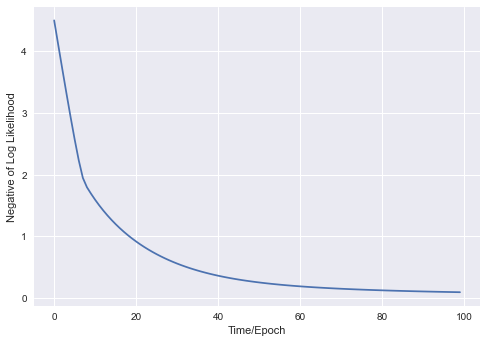

In [35]:
#print(loss)
plt.plot(loss)
plt.xlabel("Time/Epoch")
plt.ylabel("Negative of Log Likelihood")
plt.show()

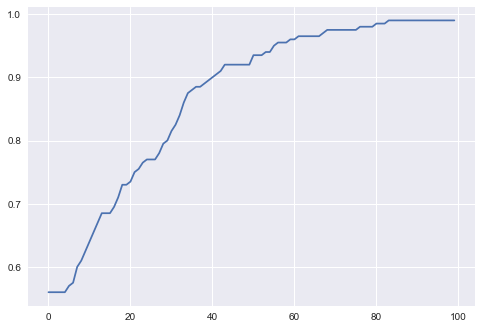

0.99


In [36]:
plt.plot(acc)
plt.show()

print(acc[-1])

# Desicion Boundary

In [37]:
print(W)
print(b)

[-0.09417545  1.00013939]
-3.0420700432882937


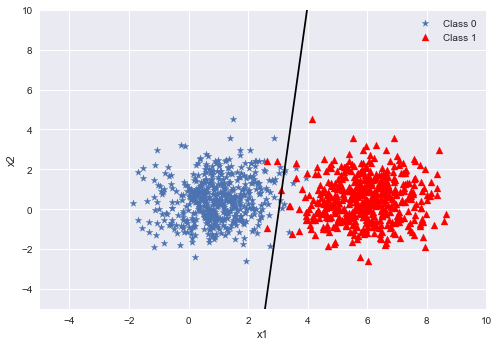

In [52]:
#plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],marker='*',label='Class 0')
plt.scatter(dist_02[:,0],dist_01[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

#Eq. of line-> x1*w0+x2*w1+b=0

x=np.linspace(-3,10,10)  #x2
y=-(W[1]*x+b)/W[0]      #x1

plt.plot(x,y,color='k')


plt.legend()
plt.show()


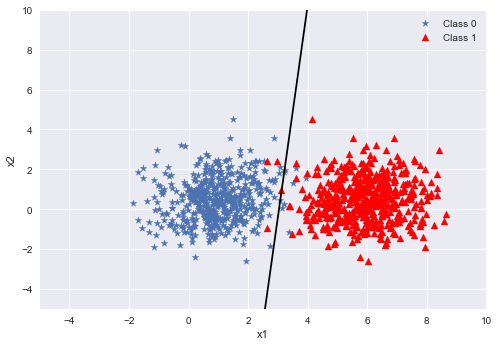

In [55]:
#plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],marker='*',label='Class 0')
plt.scatter(dist_02[:,0],dist_01[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

#Eq. of line-> x1*w0+x2*w1+b=0

x=np.linspace(-2,8,10)  #x2
y=-(W[1]*x+b)/W[0]      #x1

plt.plot(x,y,color='k')


plt.legend()
plt.show()
